<font size="5" color="red"><b>ch4. 머신러닝 모형 최적화</b></font>
# 1절. 변수 선택과 차원 축소
## 1-1 변수선택과 차원축소
- 종속변수에 영향을 주는 변수들을 찾아 학습에 사용할 독립변수의 수를 줄임
 (어떻게 하면 score를 높일 수 있을지?)
- 과적합과 변수들 사이의 다중공선성(변수들간 강한 상관관계)을 줄일 수 있음
 * 회귀계수 해석이 어려워짐. 모델 예측력이 좋아도 해석력이 떨어짐(어떤 변수가 제일 큰 요인인지 잘), p값이
나 유의성 검정이 왜곡될 수 있음
- 모형의 학습 시간을 줄일 수 있음
- 주성분분석, 상관분석, **분류모형의 feature_importance_, 예측 모형의 coef_**
- SelectKBest : 가장 높은 score에 따라 K개의 특징을 선택
## 1-2 주성분분석(PCA, Principal Component Anaysis)
- 주성분분석은 변수 선택 및 차원축소 방법(기존의 모든 변수를 조합하여 새로운 변수로 만듦) 으로 널리 사용
- 주성분 분석은 상관관계가 있는 변수들을 선형결합해서 **분산이 극대화된 상관관계가 없는 새로운 변수(주성분)
들로 축약**하는 것
- 주성분 분석은 사실 선형대수학이라기보다는 선형대수학의 활용적인 측면이 강하며 영상인식, 통계 데이터분석
(주성분 찾기), 데이터 압축, 노이즈제거 등 여러 분야에 사용
- 영상처리에서 많이 활용 : 여러개의 영상 중 대표 이미지를 찾을 때 활용

In [98]:
import seaborn as sns
from sklearn.decomposition import PCA
iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:, :-1], iris.iloc[:, -1]
iris_X.sample()

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4


In [99]:
pca = PCA(n_components=2) # n_components=2 : 주성분의 갯수
pca.fit(iris_X)
iris_pca = pca.transform(iris_X)
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [100]:
# 각 주성분의 계수 : 각 주성분이 원래 특성들과 어떤 관계가 있는지 나타내는 가중치
pca.components_
# 주성분1 = 0.36138659*x1 -0.08452251*x2 + 0.85667061*x3 + 0.3582892 *x4

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [101]:
# 설명분산 : 각 주성분 벡터가 정보량을 얼마나 잘 표현하는지(설명하는지)
pca.explained_variance_

array([4.22824171, 0.24267075])

In [102]:
# 설명분산을 0~1사이의 비율로 조정된 설명정도 : 주성분 결과 특성은 97.76852%
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

## 1-3 상관관계 확인
- 각변수들 끼리의 상관관계 확인(시각화), 종속변수와 상관관계가 높은 변수들만 선택

In [103]:
import pandas as pd
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1475,5.3,0.47,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7


In [104]:
corr = redwine.corr()
# 상관관계 결과를 시각화

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# cmap의 종류 : https://jrc-park.tistory.com/155 
# http://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap 
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html 

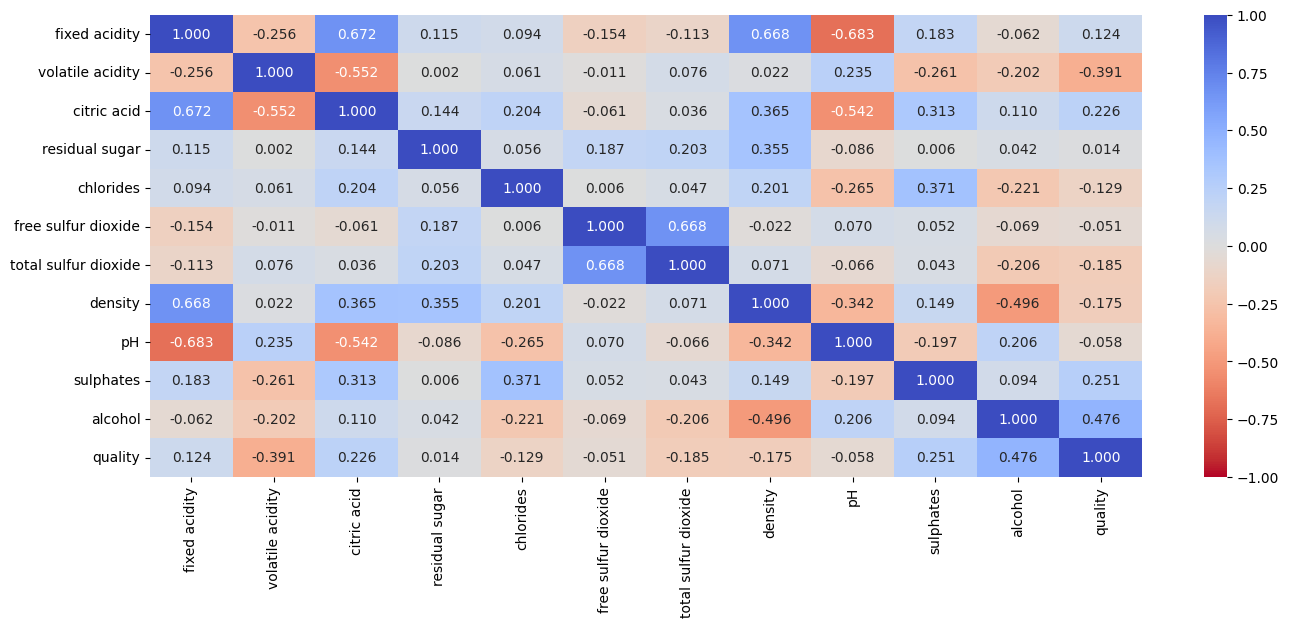

In [106]:
plt.figure(figsize=(16,6))
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap="coolwarm_r")
plt.show()

In [107]:
np.triu(np.ones_like(corr), k=0) # 대각선 포함 위가 1인 삼각행렬
np.triu(np.ones_like(corr), k=1) # 대각선 제외 위가 1인 삼각행렬
np.tril(np.ones_like(corr), k=0) # 대각선 포함 아래가 1인 삼각행렬
np.tril(np.ones_like(corr), k=-1) # 대각선 제외 아래가 1인 삼각행렬

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

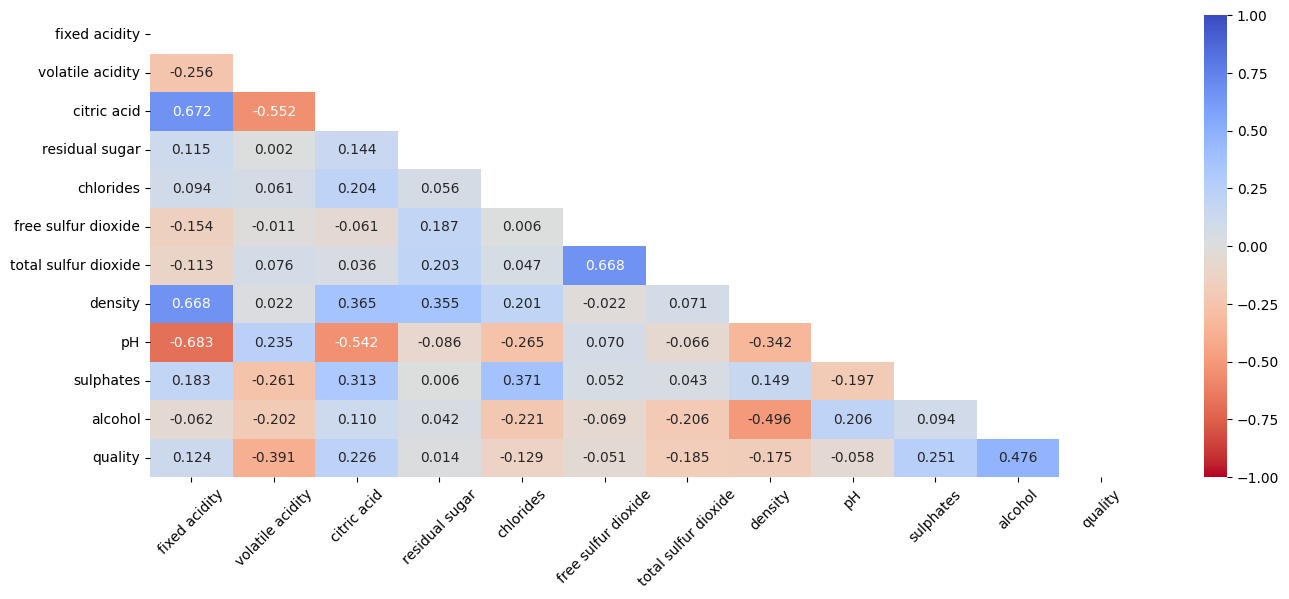

In [108]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.3f', vmin=-1, vmax=1, cmap='coolwarm_r', mask=mask)
plt.xticks(rotation=45)
plt.show()

## 1-4 분류모형의 Feature importance
- 분류모형의 feature_importance_ 속성은 각 독립변수들이 종속변수에 영향을 주는 정도
- LogisticRegression이나 SVC, MLP, GaussianNB등은 feature_importance_ 가 없음
- 그 외 분류모형은 사용가능

In [109]:
from sklearn.model_selection import train_test_split
X = redwine.iloc[:, :-1]
y = redwine.iloc[:, -1]
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, # 트리 갯수 10개
                                 random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [111]:
rf_model.feature_importances_

array([0.0798261 , 0.09492413, 0.0796232 , 0.06988474, 0.08768162,
       0.06692953, 0.11128761, 0.08682927, 0.07158881, 0.11205887,
       0.13936611])

In [65]:
features = pd.DataFrame(data=np.c_[X.columns, rf_model.feature_importances_],
                       columns=['feature', 'importance']
                       )
features['importance'].sum()

0.9999999999999999

In [76]:
features.sort_values(by='importance', ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features.head()

,feature,importance
0,alcohol,0.164515
1,sulphates,0.102722
2,volatile acidity,0.098426
3,total sulfur dioxide,0.094654
4,chlorides,0.084584


### feature_importance_를 이용한 변수 중요도 시각화

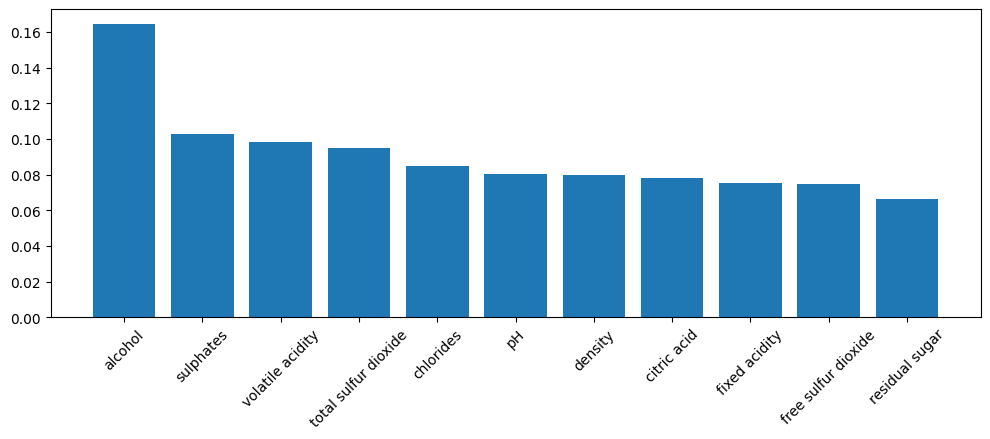

In [77]:
plt.figure(figsize=(12,4))
plt.bar(features.feature, features.importance)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [82]:
# features.importance 누적합
# l = [1, 2, 3]
# np.cumsum(l)
y_stack = np.cumsum(features.importance)
np.c_[features.importance, y_stack]

array([[0.16451528421054928, 0.16451528421054928],
       [0.1027219895766484, 0.2672372737871977],
       [0.09842633878435371, 0.3656636125715514],
       [0.09465438772103218, 0.4603180002925836],
       [0.08458376874401566, 0.5449017690365993],
       [0.0805627989963313, 0.6254645680329306],
       [0.07965428420117669, 0.7051188522341073],
       [0.07816420063728904, 0.7832830528713963],
       [0.07552922400505206, 0.8588122768764483],
       [0.07463109831625027, 0.9334433751926986],
       [0.06655662480730125, 0.9999999999999999]], dtype=object)

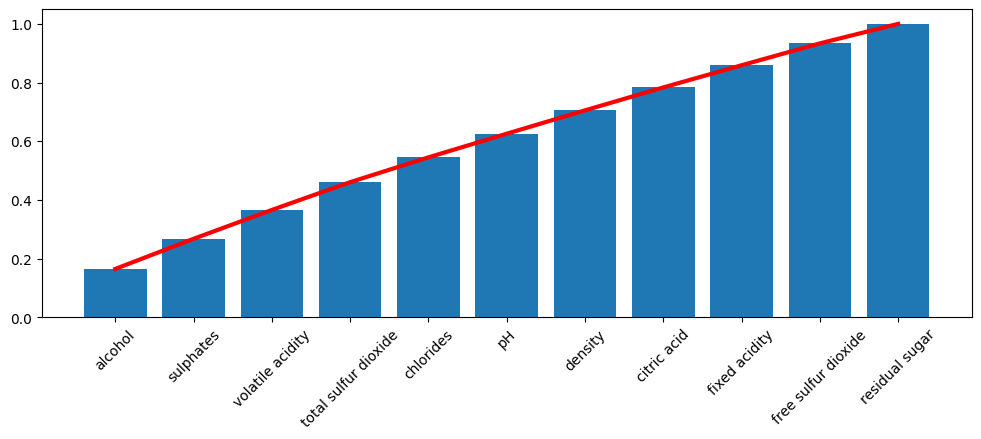

In [84]:
# 누적합을 이용하여 시각화
plt.figure(figsize=(12,4))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color='red', lw=3)
plt.xticks(rotation=45, fontsize=10)
plt.show()

### RFE(Recursive Feature Elimination) 방식
- RFE 클래스를 이용 : 중요도에 따라 중요도가 낮은 변수부터 하나씩 제거해 가면서 
  최종 선택된 변수 개수만큼 중요도가 높은 변수를 찾는다.

In [87]:
# 5개 특징이 남을 때 까지 변수를 제거(기준:feature_importances_)
from sklearn.feature_selection import RFE
rfe = RFE(rf_model,
         n_features_to_select=5)
rfe.fit(train_X, train_y)
rfe.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [88]:
features_rfe = pd.DataFrame(np.c_[X.columns, rfe.get_support()],
                           columns=['feature', 'selected'])
features_rfe[features_rfe.selected==True]

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
7,density,True
9,sulphates,True
10,alcohol,True


## 1-5 SelectKBest
- 가장 높은 score에 따라 k개 feature 선택

In [91]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X.shape, y.shape, type(X), type(y)

((150, 4), (150,), numpy.ndarray, numpy.ndarray)

In [94]:
features_names = iris.columns[:-1].tolist()
features_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [96]:
# 가장 중요한 feature 1개 추출
# f_classif : y는 범주형. X는 연속형
# chi2 : y는 범주형, x는 범주형, 양의 실수
# mutual_info : 비선형 데이터 고려...
X_new = SelectKBest(f_classif, #  x가 연속형
                    k=1 # 추출될 feature 개수
                   ).fit_transform(X,y)
X_new[:3]

array([[1.4],
       [1.4],
       [1.3]])

In [97]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2절. 파라미터 선택
- 하이퍼파라미터(사용자가 직접 설정할 수 있는 파라미터). 최적의 결과를 내는 하이퍼파라미터값?
    1. validation_curve() : 단일 하이퍼 파라미터 최적화 함수
    2. GridSearchCV() : 복수 하이퍼 파라미터 최적화 클래스(가장 높은 socre를 내는 모형까지 찾아줌)

## 2-1 validation_curve()
- param_name, param_range(리스트), scoring(성능기준지표) 매개변수로 받아 최적의 성능 계산

In [117]:
# 데이터
from sklearn.datasets import load_digits
digits = load_digits()
# digits.data : (1797, 64) 배열 (독립변수)
# digits.images : (1797, 8, 8) 배열
# digits.target : 1797 열 배열 (타겟변수)
# digits.target_names : 타겟변수 내용
X, y = digits.data, digits.target

In [119]:
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [121]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [123]:
np.all(X[0].reshape(8, 8) == digits.images[0])

True

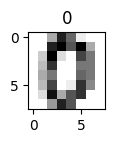

In [126]:
plt.figure(figsize=(1,1))
plt.imshow(X[0].reshape(8,8), cmap='gray_r')
plt.title(y[0])
plt.show()

In [127]:
from sklearn.svm import SVC
model = SVC(probability=True) # probability=True:판별모형이라도 proba가능
model.fit(X, y)

SVC(probability=True)

In [130]:
# 예측값
model.predict(X[0].reshape(1, -1))

array([0])

In [131]:
# 예측확률
print(model.classes_)
print(model.predict_proba(X[0].reshape(1,-1)))

[0 1 2 3 4 5 6 7 8 9]
[[9.91017462e-01 2.27421071e-04 4.83533635e-04 8.95818037e-04
  6.69796459e-04 1.41612421e-03 7.49765911e-04 9.59498879e-04
  7.37253283e-04 2.84332619e-03]]


In [133]:
for c, p in zip(model.classes_,
               model.predict_proba(X[0].reshape(1,-1))[0]) :
    print("{}일 확률 : {:.3f}".format(c, p))

0일 확률 : 0.991
1일 확률 : 0.000
2일 확률 : 0.000
3일 확률 : 0.001
4일 확률 : 0.001
5일 확률 : 0.001
6일 확률 : 0.001
7일 확률 : 0.001
8일 확률 : 0.001
9일 확률 : 0.003


In [134]:
model.score(X,y)

0.996661101836394